<a href="https://colab.research.google.com/github/ali-workshop/Developing-a-novel-strategy-using-hybrid-clustering-based-classification-for-IDS/blob/main/Developing_an_innovative_approach_using_hybrid_clustering_based_classification_in_pursuit_of_enhancing_the_efficacy_of_Network_Intrusion_Detection_mechanisms_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#download all data sets from kaggle

In [ ]:
!pip install opendatasets

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
import opendatasets as od
# 6463b4d76523a3d511aadcdd9df378ec

In [ ]:
od.download("https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alolaa
Your Kaggle Key: ··········


100%|██████████| 149M/149M [00:04<00:00, 36.0MB/s]


In [ ]:
od.download("https://www.kaggle.com/datasets/hassan06/nslkdd")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alolaa
Your Kaggle Key: ··········


100%|██████████| 13.9M/13.9M [00:00<00:00, 15.2MB/s]


In [ ]:
od.download("https://www.kaggle.com/datasets/liuwoo/botiot-2018")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alolaa
Your Kaggle Key: ··········


100%|██████████| 26.3M/26.3M [00:01<00:00, 19.1MB/s]


In [ ]:
od.download("https://www.kaggle.com/datasets/cicdataset/cicids2017/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alolaa
Your Kaggle Key: ··········


100%|██████████| 230M/230M [00:07<00:00, 30.4MB/s]


#read UNSW_B15 dataset

In [ ]:
data_UNSW_NB15=pd.read_csv("/content/unsw-nb15/UNSW_NB15_training-set.csv")

In [ ]:
data_UNSW_NB15.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


#read BOT_IOT DATA set

In [ ]:
data_BOT_IOT=pd.read_csv("/content/botiot-2018/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")

In [ ]:
data_BOT_IOT.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


#read NSL-KDD data set

In [ ]:
data_NSL = pd.read_csv("/content/nslkdd/KDDTrain+.txt")

In [ ]:
data_NSL.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


#read CICIDS dataset

In [ ]:
data_CICIDS= pd.read_csv('/content/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')


In [ ]:
data_CICIDS.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


#start with NUSW-NB15 dataset

In [ ]:
data_UNSW_NB15.shape

(82332, 45)

In [ ]:
data_UNSW_NB15.describe(include="all")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332,82332.000000
unique,NaN,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000,NaN
mean,41166.500000,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,...,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,NaN,0.550600
std,23767.345519,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,...,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,NaN,0.497436
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20583.750000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41166.500000,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61749.250000,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,...,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,NaN,1.000000


<Axes: >

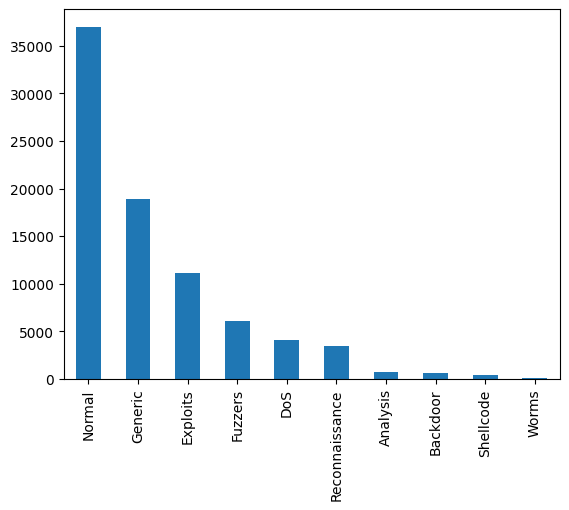

In [ ]:
data_UNSW_NB15['attack_cat'].value_counts().plot.bar()

In [ ]:
data_UNSW_NB15["attack_cat"].unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [ ]:

# Specific value to split on
specific_value = 'Normal'

# Split the DataFrame
data_UNSW_NB15_Normal = data_UNSW_NB15[data_UNSW_NB15['attack_cat'] == specific_value]
data_UNSW_NB15_attacks = data_UNSW_NB15[data_UNSW_NB15['attack_cat'] != specific_value]

In [ ]:
print(data_UNSW_NB15_Normal["attack_cat"].unique())
data_UNSW_NB15_Normal["label"].unique()

['Normal']


array([0])

In [ ]:
data_UNSW_NB15_attacks['label'].unique()

array([1])

In [ ]:
df_cat = data_UNSW_NB15_attacks.select_dtypes(exclude=[np.number])
print(df_cat.columns)
for feature in df_cat.columns:
    data_UNSW_NB15_attacks[feature] = LabelEncoder().fit_transform(data_UNSW_NB15_attacks[feature])

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')


<ipython-input-29-44ea70373eb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UNSW_NB15_attacks[feature] = LabelEncoder().fit_transform(data_UNSW_NB15_attacks[feature])
<ipython-input-29-44ea70373eb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UNSW_NB15_attacks[feature] = LabelEncoder().fit_transform(data_UNSW_NB15_attacks[feature])
<ipython-input-29-44ea70373eb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [ ]:
df_cat = data_UNSW_NB15_Normal.select_dtypes(exclude=[np.number])
print(df_cat.columns)
for feature in df_cat.columns:
    data_UNSW_NB15_Normal[feature] = LabelEncoder().fit_transform(data_UNSW_NB15_Normal[feature])

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')


<ipython-input-30-0a0a1eb84f99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UNSW_NB15_Normal[feature] = LabelEncoder().fit_transform(data_UNSW_NB15_Normal[feature])
<ipython-input-30-0a0a1eb84f99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UNSW_NB15_Normal[feature] = LabelEncoder().fit_transform(data_UNSW_NB15_Normal[feature])
<ipython-input-30-0a0a1eb84f99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
data_UNSW_NB15_Normal.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,4,0,3,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,0,0
1,2,0.000008,4,0,3,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,0,0
2,3,0.000005,4,0,3,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,0,0
3,4,0.000006,4,0,3,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,0,0
4,5,0.000010,4,0,3,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,0,0


In [ ]:
data_UNSW_NB15_attacks.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
243,244,0.921987,75,0,4,20,0,1280,0,20.607666,...,1,2,0,0,0,1,1,0,6,1
244,245,0.921987,75,0,4,20,0,1280,0,20.607666,...,1,2,0,0,0,1,1,0,6,1
245,246,0.921987,75,0,4,20,0,1280,0,20.607666,...,1,2,0,0,0,1,1,0,1,1
246,247,0.921987,75,0,4,20,0,1280,0,20.607666,...,1,2,0,0,0,1,1,0,2,1
247,248,0.000009,93,0,4,2,0,104,0,111111.107200,...,1,2,0,0,0,1,1,0,3,1


#our approach

##meta clustering

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

# Apply K-means
kmeans = KMeans(n_clusters=9)
kmeans_labels = kmeans.fit_predict(data_UNSW_NB15_attacks)

# Apply DBSCAN
dbscan = DBSCAN(eps=1000, min_samples=100)
dbscan_labels = dbscan.fit_predict(data_UNSW_NB15_attacks)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
(unique1, counts1)=np.unique(dbscan_labels,return_counts=True)
(unique2, counts2)=np.unique(kmeans_labels,return_counts=True)

In [ ]:
(unique1, counts1)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21]),
 array([26856,   853,  1420,   874,   406,  1700,  2139,  3086,   740,
         1070,   633,   385,   214,   137,  1809,  1142,   155,   896,
          141,   101,   254,   130,   191]))

In [ ]:
(unique2, counts2)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
 array([30741,  1712,  1695,  1903,  1711,  1857,  2016,  1809,  1888]))

In [ ]:
from collections import Counter

# Combine K-means and DBSCAN cluster labels
combined_labels = list(zip(kmeans_labels, dbscan_labels))

# Create a meta-cluster
meta_cluster_labels = []
for labels in combined_labels:
   counter = Counter(labels)
   meta_cluster_labels.append(counter.most_common(1)[0][0])


In [ ]:
print(len(meta_cluster_labels))
print(len(kmeans_labels))
print(len(dbscan_labels))

45332
45332
45332


In [ ]:
meta_cluster_labels=np.array(meta_cluster_labels)

In [ ]:
meta_cluster_labels=meta_cluster_labels.reshape(meta_cluster_labels.shape[0],-1)

In [ ]:
meta_cluster_labels.shape

(45332, 1)

In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 48.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039287 sha256=a550aa9fad14829e242c6e78a63a233b743dd6bafe8feeb14742d33775440a67
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.6
    Uninstalling Cython-3.0.6:
      Successfully uninstalled Cython-3.0.6


In [ ]:
import hdbscan

In [ ]:
# Apply HDBSCAN to the meta-cluster
hdbscan1 = hdbscan.HDBSCAN(min_cluster_size=10)
final_labels = hdbscan1.fit_predict(meta_cluster_labels)

In [ ]:
print(len(final_labels))

45332


In [ ]:
(unique2, counts2)=np.unique(final_labels,return_counts=True)

In [ ]:
(unique2, counts2)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([30741,  1712,  1695,  1809,  1888,  1903,  1711,  1857,  2016]))

#remerge normal with attack labels

In [ ]:
data_UNSW_NB15_attacks.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
data_UNSW_NB15_attacks=data_UNSW_NB15_attacks.drop(["id","attack_cat","label"],axis=1)

In [ ]:
data_UNSW_NB15_attacks.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [ ]:
data_UNSW_NB15_Normal.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
data_UNSW_NB15_Normal.drop(columns=["id","label"],axis=1,inplace=True)

<ipython-input-55-3e06f9fc6e92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UNSW_NB15_Normal.drop(columns=["id","label"],axis=1,inplace=True)


In [ ]:
data_UNSW_NB15_Normal.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat'],
      dtype='object')

In [ ]:
data_UNSW_NB15_attacks["target"]=final_labels

In [ ]:
data_UNSW_NB15_Normal['target']=data_UNSW_NB15_Normal["attack_cat"]

<ipython-input-58-32d86b372399>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UNSW_NB15_Normal['target']=data_UNSW_NB15_Normal["attack_cat"]


In [ ]:
data_UNSW_NB15_Normal.drop(columns=["attack_cat"],axis=1,inplace=True)


<ipython-input-59-d6e81948a61f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UNSW_NB15_Normal.drop(columns=["attack_cat"],axis=1,inplace=True)


In [ ]:
# Replace 0 with 9 and 1 with 5 in the 'label' column
data_UNSW_NB15_Normal['target'] = data_UNSW_NB15_Normal['target'].replace({0: 9})


<ipython-input-62-e51c75558bfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UNSW_NB15_Normal['target'] = data_UNSW_NB15_Normal['target'].replace({0: 9})


In [ ]:
data_UNSW_NB15_Normal['target'].unique()

array([9])

In [ ]:
data_UNSW_NB15_attacks['target'].unique()

array([0, 3, 7, 5, 2, 1, 8, 6, 4])

In [ ]:
print(data_UNSW_NB15_attacks.columns)
print("------------------------------")
print(data_UNSW_NB15_Normal.columns)

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'target'],
      dtype='object')
------------------------------
Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm',

#merge the two dataframes

In [ ]:
print(data_UNSW_NB15_attacks.shape)
print(data_UNSW_NB15_Normal.shape)

(45332, 43)
(37000, 43)


In [ ]:
final_data = pd.concat([data_UNSW_NB15_attacks, data_UNSW_NB15_Normal], ignore_index=True)

In [ ]:
data_UNSW_NB15.shape

(82332, 45)

In [ ]:
final_data.shape

(82332, 43)

In [ ]:
final_data["target"].unique()

array([0, 3, 7, 5, 2, 1, 8, 6, 4, 9])

In [ ]:
final_data["target"].value_counts()

9    37000
0    30741
8     2016
5     1903
4     1888
7     1857
3     1809
1     1712
6     1711
2     1695
Name: target, dtype: int64

#start with c.50

In [ ]:
from re import X
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:

X=final_data.drop(columns=['target'])
y=final_data['target']


In [ ]:
print(X.shape)

(82332, 42)


In [ ]:
print(y.shape)

(82332,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
dt_model = DecisionTreeClassifier( criterion='gini',max_depth=20,min_samples_split=2, min_samples_leaf=1,random_state=42)

dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9976923544057813


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Assuming model is your machine learning model
# Assuming X and y are your features and target variable
# Adjust these variables based on your actual model and data

# Define the number of folds
num_folds = 5

# Create a StratifiedKFold object for stratified sampling (maintains class distribution)
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(dt_model, X, y, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Display the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Scores: [0.99775308 0.99775308 0.99757075 0.99751002 0.99763148]
Mean Accuracy: 0.9976436838799485
Standard Deviation: 9.723133561654941e-05


Accuracy: 0.9977
Precision: 0.9977
Recall: 0.9977
F1 Score: 0.9977


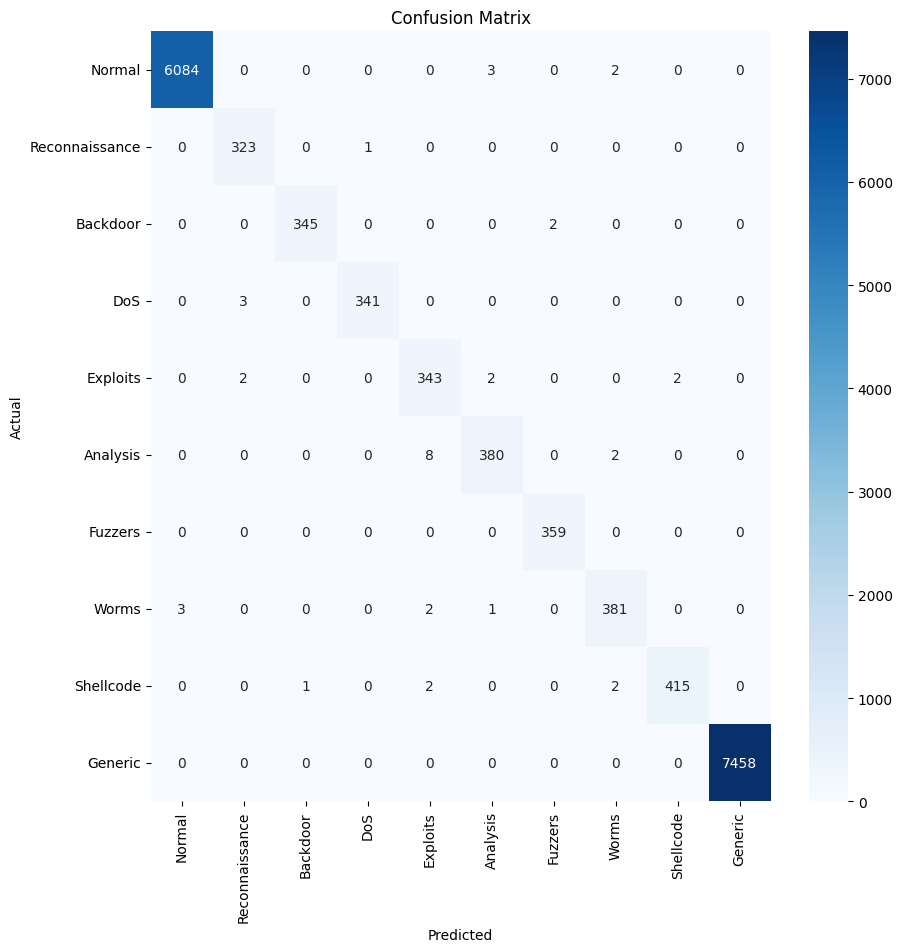

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names):
    # Calculate metrics
    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    # Print metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Create confusion matrix
    cm = confusion_matrix(actual_labels, predicted_labels)

    # Plot confusion matrix
    plt.figure(figsize=(len(label_names), len(label_names)))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example usage:
# Assuming you have actual labels, predicted labels, and label names
actual_labels = y_test
predicted_labels =dt_model.predict(X_test)
label_names = ['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic']

# Call the function
calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names)


#tune using HYPEROPT

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Define the search space
space = {
   'criterion': hp.choice('criterion', ['gini', 'entropy']),
   'max_depth': hp.choice('max_depth', range(1, 25)),
   'min_samples_split': hp.uniform('min_samples_split', 0.001, 1),
   'min_samples_leaf': hp.uniform('min_samples_leaf', 0.001,1 ),
}

# Define the objective function
def objective(params):
   clf = DecisionTreeClassifier(**params)
   score = cross_val_score(clf, X_train, y_train, cv=3).mean()
   return {'loss': -score, 'status': STATUS_OK }

# Run the optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

#start with NSL-KDD dataset

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Read Train and Test dataset
data_train = pd.read_csv("/content/nslkdd/KDDTrain+.txt")

In [ ]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [ ]:
# Assign name for columns
data_train.columns = columns

In [ ]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

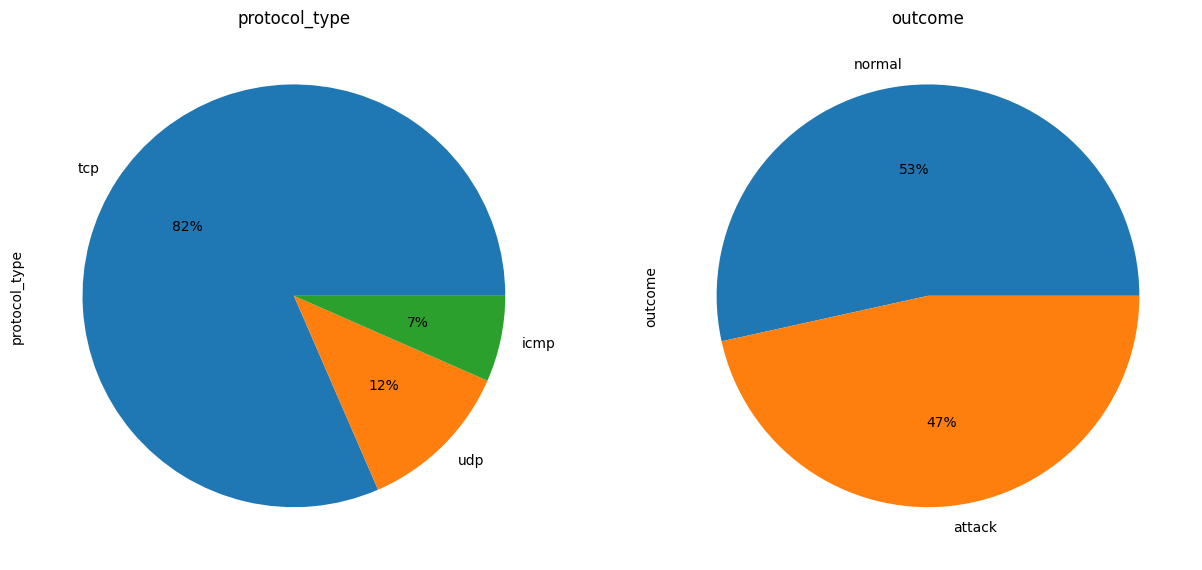

In [ ]:
pie_plot(data_train, ['protocol_type', 'outcome'], 1, 2)

In [ ]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df


In [ ]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]

    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1

    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [ ]:
scaled_train = preprocess(data_train)

In [ ]:
scaled_train.shape


(125972, 124)

In [ ]:
len(scaled_train["level"].unique())

22

In [ ]:
scaled_train["outcome"].value_counts()

0    67342
1    58630
Name: outcome, dtype: int64

In [ ]:
scaled_train['outcome'].unique()

array([0, 1], dtype=object)

In [ ]:
# Specific value to split on
specific_value = 0

# Split the DataFrame
scaled_train_Normal = scaled_train[scaled_train['outcome'] == specific_value]
scaled_train_attacks = scaled_train[scaled_train['outcome'] != specific_value]

In [ ]:
x = scaled_train_attacks.values
pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)

#our approach

In [ ]:
x_reduced.shape


(58630, 20)

In [ ]:
x=x_reduced

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

# Apply K-means
kmeans = KMeans(n_clusters=1)
kmeans_labels = kmeans.fit_predict(x)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=100)
dbscan_labels = dbscan.fit_predict(x)


In [ ]:
len(dbscan_labels)

58630

In [ ]:
(unique1, counts1)=np.unique(dbscan_labels,return_counts=True)
(unique2, counts2)=np.unique(kmeans_labels,return_counts=True)

In [ ]:
(unique1, counts1)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 array([14802,   734,  1745,  9454,  1536,  5010,  6305,  1369,   495,
         7282,  1542,   866,   816,   775,   596,   202,   560,   109,
          755,   271,   863,   216,   568,   249,   263,   174,   211,
          171,   173,   106,   158,   124,   130]))

In [ ]:
(unique2, counts2)

(array([0], dtype=int32), array([58630]))

In [ ]:
from collections import Counter

# Combine K-means and DBSCAN cluster labels
combined_labels = list(zip(kmeans_labels, dbscan_labels))

# Create a meta-cluster
meta_cluster_labels = []
for labels in combined_labels:
   counter = Counter(labels)
   meta_cluster_labels.append(counter.most_common(1)[0][0])


In [ ]:
print(len(meta_cluster_labels))
print(len(kmeans_labels))
print(len(dbscan_labels))

58630
58630
58630


In [ ]:
dbscan_labels.shape

(58630,)

In [ ]:
meta_cluster_labels=np.array(meta_cluster_labels)

In [ ]:
meta_cluster_labels=meta_cluster_labels.reshape(meta_cluster_labels.shape[0],-1)

In [ ]:
np.unique(meta_cluster_labels)

array([0], dtype=int32)

In [ ]:
meta_cluster_labels.shape

(58630, 1)

In [ ]:
!pip install hdbscan

In [ ]:
import hdbscan

In [ ]:
# Apply HDBSCAN to the meta-cluster
hdbscan1 = hdbscan.HDBSCAN(min_cluster_size=1000,algorithm='best', alpha=0.5, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=400,min_samples=1100)
final_labels = hdbscan1.fit_predict(meta_cluster_labels)

In [ ]:
len(final_labels)

58630

In [ ]:
final_labels.shape

(58630,)

In [ ]:
(unique3, counts3)=np.unique(final_labels,return_counts=True)

In [ ]:
(unique3, counts3)

(array([-1,  0,  1]), array([18316, 10992, 29322]))

In [ ]:
NSL_attack=pd.DataFrame(x_reduced)

In [ ]:
NSL_attack.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-303.755291,-78.072882,-419.727344,-3.437247,-1.366933,-1.619045,-0.269844,-0.042568,0.156193,-0.302629,0.563279,-0.397503,0.096016,0.542768,-0.039832,-0.000596,-0.081252,0.062252,0.060470,-0.105135
1,-303.755294,-78.072888,-419.727390,-3.483625,-0.661652,-1.460245,0.652878,-1.251682,-0.336233,0.716331,-2.665963,-0.612986,-0.090067,0.355457,0.033353,-0.089015,0.015668,0.007411,-0.192000,-0.127639
2,-303.755295,-78.072892,-419.727621,-3.685025,-1.202722,-1.954795,0.252384,-1.604992,-0.012115,0.740670,0.394042,-0.345046,0.212102,0.384649,0.051916,-0.094091,-0.040737,-0.023631,0.048717,0.005364
3,-303.755295,-78.072891,-419.727573,-3.622894,-0.874042,-1.830541,0.491990,-1.507081,-0.218285,0.745551,0.436557,-0.695415,0.030673,0.304366,0.058520,-0.102002,-0.022551,-0.022646,0.029970,-0.001397
4,-303.755296,-78.072893,-419.727697,-3.600237,-0.391332,-2.170021,0.702998,-1.500209,-0.101831,0.716993,0.424030,0.585522,0.093782,-0.285403,0.058113,-0.026140,0.047463,-0.117260,-0.000417,0.042999


In [ ]:
NSL_attack["target"]=final_labels

In [ ]:
NSL_attack.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,target
0,-303.755291,-78.072882,-419.727344,-3.437247,-1.366933,-1.619045,-0.269844,-0.042568,0.156193,-0.302629,0.563279,-0.397503,0.096016,0.542768,-0.039832,-0.000596,-0.081252,0.062252,0.060470,-0.105135,1
1,-303.755294,-78.072888,-419.727390,-3.483625,-0.661652,-1.460245,0.652878,-1.251682,-0.336233,0.716331,-2.665963,-0.612986,-0.090067,0.355457,0.033353,-0.089015,0.015668,0.007411,-0.192000,-0.127639,1
2,-303.755295,-78.072892,-419.727621,-3.685025,-1.202722,-1.954795,0.252384,-1.604992,-0.012115,0.740670,0.394042,-0.345046,0.212102,0.384649,0.051916,-0.094091,-0.040737,-0.023631,0.048717,0.005364,1
3,-303.755295,-78.072891,-419.727573,-3.622894,-0.874042,-1.830541,0.491990,-1.507081,-0.218285,0.745551,0.436557,-0.695415,0.030673,0.304366,0.058520,-0.102002,-0.022551,-0.022646,0.029970,-0.001397,1
4,-303.755296,-78.072893,-419.727697,-3.600237,-0.391332,-2.170021,0.702998,-1.500209,-0.101831,0.716993,0.424030,0.585522,0.093782,-0.285403,0.058113,-0.026140,0.047463,-0.117260,-0.000417,0.042999,1


In [ ]:
NSL_attack["target"].unique()

array([ 1, -1,  0])

In [ ]:
NSL_Normal=pd.DataFrame(xn_reduced)

In [ ]:
scaled_train_Normal["outcome"].unique()

array([0], dtype=object)

In [ ]:
NSL_Normal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-55.728683,-166.013726,-6.012933,0.245240,-12.571359,5.345175,-5.291454,1.571719,0.116998,5.245349,4.904253,0.266462,0.139880,-0.513545,0.084724,1.127857,0.567465,0.271705,0.157956,0.336595
1,-54.900411,-165.993543,9.769735,-0.526044,0.601783,-2.168651,0.538353,-0.502706,-0.227984,-0.246670,-0.397001,-0.033957,0.043049,-0.485283,-0.150355,-0.154187,0.397956,-0.140810,0.077059,-0.025671
2,-55.511917,-166.038917,-5.184833,0.253595,2.326223,-0.404917,-0.633913,-0.518747,-0.263758,-0.135704,-0.581555,-0.016303,0.010825,-0.176140,0.435644,0.478745,-0.251093,0.014536,-0.012284,0.038443
3,-55.076956,-166.041223,-1.655173,0.065873,-0.479994,-1.379225,-0.177040,-0.787279,-0.169000,-0.524419,-0.447931,-0.031612,0.070393,-0.498321,-0.225544,-0.324923,0.352284,0.042632,-0.215427,0.204829
4,-54.295925,-165.969122,20.661600,-1.094751,1.320426,-1.830846,-0.221436,-0.545495,-0.262350,-0.205833,-0.402440,-0.028113,0.027948,-0.375972,-0.038988,-0.010603,0.223585,-0.009514,-0.087290,0.069258


In [ ]:
NSL_Normal['target']=scaled_train_Normal["outcome"]

In [ ]:
NSL_Normal['target'].unique()

array([0, nan], dtype=object)

In [ ]:
NSL_Normal=NSL_Normal.fillna(0)

In [ ]:
NSL_Normal['target'].unique()

array([0])

In [ ]:
NSL_Normal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,target
0,-55.728683,-166.013726,-6.012933,0.245240,-12.571359,5.345175,-5.291454,1.571719,0.116998,5.245349,4.904253,0.266462,0.139880,-0.513545,0.084724,1.127857,0.567465,0.271705,0.157956,0.336595,0
1,-54.900411,-165.993543,9.769735,-0.526044,0.601783,-2.168651,0.538353,-0.502706,-0.227984,-0.246670,-0.397001,-0.033957,0.043049,-0.485283,-0.150355,-0.154187,0.397956,-0.140810,0.077059,-0.025671,0
2,-55.511917,-166.038917,-5.184833,0.253595,2.326223,-0.404917,-0.633913,-0.518747,-0.263758,-0.135704,-0.581555,-0.016303,0.010825,-0.176140,0.435644,0.478745,-0.251093,0.014536,-0.012284,0.038443,0
3,-55.076956,-166.041223,-1.655173,0.065873,-0.479994,-1.379225,-0.177040,-0.787279,-0.169000,-0.524419,-0.447931,-0.031612,0.070393,-0.498321,-0.225544,-0.324923,0.352284,0.042632,-0.215427,0.204829,0
4,-54.295925,-165.969122,20.661600,-1.094751,1.320426,-1.830846,-0.221436,-0.545495,-0.262350,-0.205833,-0.402440,-0.028113,0.027948,-0.375972,-0.038988,-0.010603,0.223585,-0.009514,-0.087290,0.069258,0


In [ ]:
print(len(scaled_train))
print(len(NSL_Normal)+len(NSL_attack))
print()

125972
125972



In [ ]:
# Replace 0 with 9 and 1 with 5 in the 'label' column
NSL_Normal['target'] = NSL_Normal['target'].replace({0: 2})


In [ ]:
NSL_Normal['target'].unique()

array([2])

In [ ]:
# Replace 0 with 9 and 1 with 5 in the 'label' column
NSL_attack['target'] = NSL_attack['target'].replace({1: 0,-1:0})


In [ ]:
NSL_attack['target'].unique()

array([0])

#merge the two dataframes

In [ ]:
print(NSL_attack.shape)
print(NSL_Normal.shape)

(58630, 21)
(67342, 21)


In [ ]:
final_data = pd.concat([NSL_attack, NSL_Normal], ignore_index=True)

In [ ]:
final_data.shape

(125972, 21)

In [ ]:
final_data["target"].unique()

array([0, 2])

In [ ]:
final_data["target"].value_counts()

2    67342
0    58630
Name: target, dtype: int64

In [ ]:
final_data = final_data.sample(frac=1).reset_index(drop=True)

In [ ]:
x=final_data.drop(columns=["target"])
y=final_data["target"]

In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-56.090862,-166.013727,-5.719973,0.283177,5.334763,8.737776,2.767808,0.628791,0.078569,0.274505,0.575706,-0.022802,-0.088633,0.200107,-0.107781,0.079280,0.205195,0.066762,-0.054413,-0.160182
1,-303.755294,-78.072887,-419.727494,-3.504347,-0.693268,-1.748383,0.431062,-0.704482,-0.159473,0.259015,0.542895,0.564327,0.031526,-0.221570,-0.010010,0.045438,0.016435,-0.010030,0.029587,0.046259
2,-303.755293,-78.072886,-419.727441,-3.583191,-1.462021,-1.448314,0.064775,-0.786903,0.073015,0.194232,0.539842,-0.035822,-0.267342,-0.355528,-0.017298,0.094057,-0.008479,0.065684,-0.083494,0.023593
3,-303.653839,-78.072767,-419.722525,4.175336,6.261831,4.392095,-5.302110,1.409559,-2.705979,-0.770014,0.101215,-1.177829,2.241747,-0.622489,-0.419637,1.234518,0.810281,-0.642923,-0.044712,-0.291803
4,-303.755288,-78.072874,-419.727021,-3.168446,-1.199970,-1.136699,-0.376841,0.997287,0.063846,-0.844902,-2.458150,-0.294252,-0.063146,0.688475,-0.116509,0.069437,-0.062196,0.150156,-0.155971,-0.273200


#split the data set innot train and test

In [ ]:

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)


In [ ]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train),average="weighted")
    test_precision = metrics.precision_score(y_test, model.predict(X_test),average="weighted")

    train_recall = metrics.recall_score(y_train, model.predict(X_train),average="weighted")
    test_recall = metrics.recall_score(y_test, model.predict(X_test),average="weighted")

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))




In [ ]:

tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 99.99319589031775
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 99.99319601720923
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 99.99319589031775


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Assuming model is your machine learning model
# Assuming X and y are your features a
# Adjust these variables based on your actual model and data

# Define the number of folds
num_folds = 5

# Create a StratifiedKFold object for stratified sampling (maintains class distribution)
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(tdt, x_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Display the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Scores: [1.         1.         1.         1.         0.99993894]
Mean Accuracy: 0.9999877870053737
Standard Deviation: 2.442598925256334e-05


Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1 Score: 0.9999


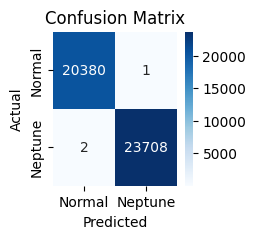

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names):
    # Calculate metrics
    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    # Print metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Create confusion matrix
    cm = confusion_matrix(actual_labels, predicted_labels)

    # Plot confusion matrix
    plt.figure(figsize=(len(label_names), len(label_names)))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example usage:
# Assuming you have actual labels, predicted labels, and label names
actual_labels = y_test
predicted_labels = tdt.predict(x_test)
label_names = ['Normal', 'Neptune']

# Call the function
calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names)


In [ ]:
print(data_train.shape)

(125972, 43)


[Text(0.375, 0.875, 'x[0] <= -59.043\ngini = 0.498\nsamples = 81881\nvalue = [38249, 43632]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 37952\nvalue = [37952, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4065.318\ngini = 0.013\nsamples = 43929\nvalue = [297, 43632]'),
 Text(0.25, 0.375, 'x[2] <= -2584.998\ngini = 0.0\nsamples = 43630\nvalue = [2, 43628]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 43628\nvalue = [0, 43628]'),
 Text(0.75, 0.375, 'x[3] <= -194.052\ngini = 0.026\nsamples = 299\nvalue = [295, 4]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 295\nvalue = [295, 0]')]

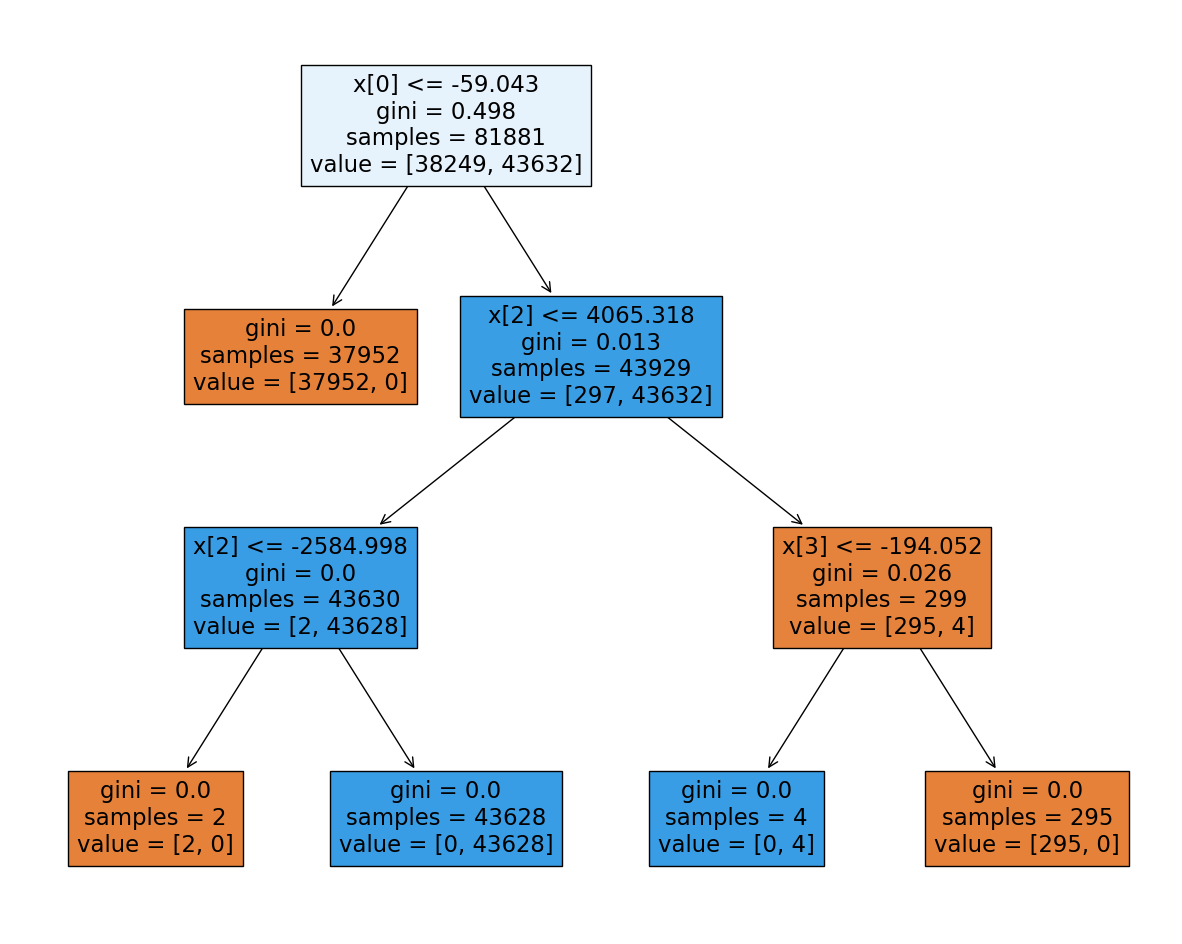

In [ ]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(tdt , filled=True)

#tune using HYPEROPT

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Define the search space
space = {
   'criterion': hp.choice('criterion', ['gini', 'entropy']),
   'max_depth': hp.choice('max_depth', range(1, 25)),
   'min_samples_split': hp.uniform('min_samples_split', 0.001, 1),
   'min_samples_leaf': hp.uniform('min_samples_leaf', 0.001,1 ),
}

# Define the objective function
def objective(params):
   clf = DecisionTreeClassifier(**params)
   score = cross_val_score(clf, X_train, y_train, cv=3).mean()
   return {'loss': -score, 'status': STATUS_OK }

# Run the optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

#start with the BOTIOT Dataset

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/botiot-2018/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")

In [ ]:
print(len(data))

733705


In [ ]:
print(data.shape)

(733705, 19)


In [ ]:
print(data.columns)

Index(['pkSeqID', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack', 'category', 'subcategory'],
      dtype='object')


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733705 entries, 0 to 733704
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pkSeqID            733705 non-null  int64  
 1   proto              733705 non-null  object 
 2   saddr              733705 non-null  object 
 3   sport              733705 non-null  object 
 4   daddr              733705 non-null  object 
 5   dport              733705 non-null  object 
 6   seq                733705 non-null  int64  
 7   stddev             733705 non-null  float64
 8   N_IN_Conn_P_SrcIP  733705 non-null  int64  
 9   min                733705 non-null  float64
 10  state_number       733705 non-null  int64  
 11  mean               733705 non-null  float64
 12  N_IN_Conn_P_DstIP  733705 non-null  int64  
 13  drate              733705 non-null  float64
 14  srate              733705 non-null  float64
 15  max                733705 non-null  float64
 16  at

In [ ]:
data.describe()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,7.337050e+05,733705.000000,733705.000000,733705.000000,733705.000000,733705.000000,733705.000000,733705.000000,733705.000000,733705.000000,733705.000000,733705.000000
mean,1.834472e+06,121412.819892,0.887894,82.492551,1.018868,3.135073,2.233429,92.427763,0.506298,2.262398,3.023000,0.999854
std,1.058826e+06,75823.398840,0.804013,24.426145,1.484235,1.186427,1.517572,18.216076,74.330175,403.408092,1.860725,0.012075
min,2.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.172220e+05,54993.000000,0.030132,69.000000,0.000000,3.000000,0.182193,100.000000,0.000000,0.156231,0.281688,1.000000
50%,1.834043e+06,117896.000000,0.795481,100.000000,0.000000,4.000000,2.691715,100.000000,0.000000,0.283784,4.011386,1.000000
75%,2.751959e+06,185157.000000,1.745595,100.000000,2.163444,4.000000,3.566569,100.000000,0.000000,0.488849,4.296505,1.000000
max,3.668507e+06,262212.000000,2.496758,100.000000,4.980470,11.000000,4.981785,100.000000,58823.527344,333333.312500,4.999999,1.000000


In [ ]:
data.dtypes

pkSeqID                int64
proto                 object
saddr                 object
sport                 object
daddr                 object
dport                 object
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
attack                 int64
category              object
subcategory           object
dtype: object

In [ ]:
data.columns

Index(['pkSeqID', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack', 'category', 'subcategory'],
      dtype='object')

In [ ]:
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


In [ ]:
print(data["attack"].unique())

[1 0]


In [ ]:
print(data["category"].unique())

['DoS' 'DDoS' 'Reconnaissance' 'Normal' 'Theft']


In [ ]:
print(data['subcategory'].unique())

['UDP' 'TCP' 'Service_Scan' 'HTTP' 'OS_Fingerprint' 'Normal' 'Keylogging']


###define the numerical features and the catigorical features/

In [ ]:
data.drop(columns=["attack","daddr","saddr","dport","sport"],inplace=True,axis=1)

In [ ]:
# Select numerical features
numeric_features = data.select_dtypes(include=['number'])

# Select categorical features
categorical_features = data.select_dtypes(include=['object'])

In [ ]:
categorical_features.shape

(733705, 3)

In [ ]:
print(len(numeric_features))

733705


In [ ]:
print(data.shape)

(733705, 14)


In [ ]:
data.columns

Index(['pkSeqID', 'proto', 'seq', 'stddev', 'N_IN_Conn_P_SrcIP', 'min',
       'state_number', 'mean', 'N_IN_Conn_P_DstIP', 'drate', 'srate', 'max',
       'category', 'subcategory'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Separate numeric and categorical features
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Scaling numeric features
scaler = MinMaxScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Categorizing categorical features using one-hot encoding
data = pd.get_dummies(data, columns=categorical_features)


In [ ]:
data.head()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,proto_arp,proto_icmp,proto_ipv6-icmp,proto_tcp,proto_udp,category_DDoS,category_DoS,category_Normal,category_Reconnaissance,category_Theft,subcategory_HTTP,subcategory_Keylogging,subcategory_Normal,subcategory_OS_Fingerprint,subcategory_Service_Scan,subcategory_TCP,subcategory_UDP
0,0.215992,0.667756,0.090831,1.000000,0.823303,0.3,0.894736,1.0,0.000000,1.214133e-06,0.943888,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,0.560560,0.545450,0.181034,1.000000,0.690549,0.0,0.764018,1.0,0.000004,1.204191e-06,0.888586,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.762067,0.637014,0.773624,0.727273,0.000000,0.3,0.548238,1.0,0.000000,1.221861e-06,0.827691,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,0.577349,0.780341,0.171742,0.555556,0.656848,0.0,0.727937,1.0,0.000000,1.030962e-06,0.845940,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0.082782,0.152766,0.824422,1.000000,0.000000,0.2,0.238550,1.0,0.000000,4.075260e-07,0.950726,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
print(len(data))
print(data.shape)

733705
(733705, 28)


In [ ]:
data=data[:50000]

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

# Apply K-means
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(data)


In [ ]:
len(dbscan_labels)

50000

In [ ]:
import numpy as np

In [ ]:
(unique1, counts1)=np.unique(dbscan_labels,return_counts=True)
(unique2, counts2)=np.unique(kmeans_labels,return_counts=True)

In [ ]:
(unique1, counts1)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([  120,  4379,  2819, 12950,  1039,  9304,  4927,   527,  5540,
         7268,   206,   324,   111,   147,   250,    89]))

In [ ]:
(unique2, counts2)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([ 8320, 12951, 13351, 14165,  1213]))

In [ ]:
from collections import Counter

# Combine K-means and DBSCAN cluster labels
combined_labels = list(zip(kmeans_labels, dbscan_labels))

# Create a meta-cluster
meta_cluster_labels = []
for labels in combined_labels:
   counter = Counter(labels)
   meta_cluster_labels.append(counter.most_common(1)[0][0])


In [ ]:
print(len(meta_cluster_labels))
print(len(kmeans_labels))
print(len(dbscan_labels))

50000
50000
50000


In [ ]:
dbscan_labels.shape

(50000,)

In [ ]:
meta_cluster_labels=np.array(meta_cluster_labels)

In [ ]:
meta_cluster_labels=meta_cluster_labels.reshape(meta_cluster_labels.shape[0],-1)

In [ ]:
meta_cluster_labels.shape

(50000, 1)

In [ ]:
!pip install hdbscan

In [ ]:
import hdbscan

In [ ]:
# Apply HDBSCAN to the meta-cluster
hdbscan1 = hdbscan.HDBSCAN(min_cluster_size=10)
final_labels = hdbscan1.fit_predict(meta_cluster_labels)

In [ ]:
X=data
y=final_labels

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [ ]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train),average="weighted")
    test_precision = metrics.precision_score(y_test, model.predict(X_test),average="weighted")

    train_recall = metrics.recall_score(y_train, model.predict(X_train),average="weighted")
    test_recall = metrics.recall_score(y_test, model.predict(X_test),average="weighted")

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))




In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4])

In [ ]:

tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 99.97714285714285
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 99.97715507793731
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 99.97714285714285


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Assuming model is your machine learning model
# Assuming X and y are your features and target variable
# Adjust these variables based on your actual model and data

# Define the number of folds
num_folds = 5

# Create a StratifiedKFold object for stratified sampling (maintains class distribution)
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(tdt, x_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Display the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Scores: [0.99984615 1.         1.         0.99984615 0.99984615]
Mean Accuracy: 0.9999076923076924
Standard Deviation: 7.536891516256776e-05


Accuracy: 0.9998
Precision: 0.9998
Recall: 0.9998
F1 Score: 0.9998


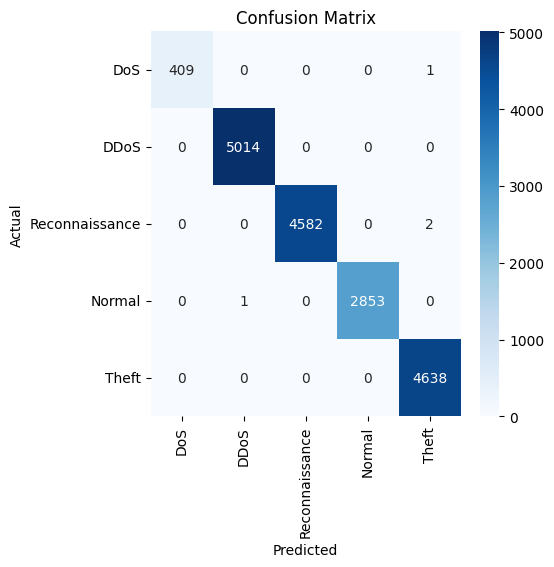

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names):
    # Calculate metrics
    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    # Print metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Create confusion matrix
    cm = confusion_matrix(actual_labels, predicted_labels)

    # Plot confusion matrix
    plt.figure(figsize=(len(label_names), len(label_names)))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example usage:
# Assuming you have actual labels, predicted labels, and label names
actual_labels = y_test
predicted_labels = tdt.predict(x_test)
label_names = ['DoS', 'DDoS', 'Reconnaissance', 'Normal', 'Theft']


# Call the function
calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names)


#tune using HYPEROPT

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Define the search space
space = {
   'criterion': hp.choice('criterion', ['gini', 'entropy']),
   'max_depth': hp.choice('max_depth', range(1, 25)),
   'min_samples_split': hp.uniform('min_samples_split', 0.001, 1),
   'min_samples_leaf': hp.uniform('min_samples_leaf', 0.001,1 ),
}

# Define the objective function
def objective(params):
   clf = DecisionTreeClassifier(**params)
   score = cross_val_score(clf, X_train, y_train, cv=3).mean()
   return {'loss': -score, 'status': STATUS_OK }

# Run the optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

#start wiht CICIDS Dataset

In [ ]:
# 'Reduced dimensions' variable for altering the number of PCA principal components. Can be altered for needs.
# Only 7 principal components needed when using non-normalised PCA dataset.
dimensions_num_for_PCA = 7

# Max number of permutations to run. Can be altered for needs.
number_of_permutations = 100

# 10 folds is usually the heuristic to follow for larger datasets of around this size.
num_of_splits_for_skf = 10

# Seed value to pass into models so that repeated runs result in the same output
seed_val = 1

# Number of statistical distance measures to run (for the results, columns section)
num_of_statistical_dist_measures = 6



In [ ]:
Friday_Morning_Data = pd.read_csv('/content/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df = Friday_Morning_Data.copy()
print("Datatype of Dataframe i.e. Pandas Dataframe: ", type(df))
print("Datatype of Column i.e. Pandas Series: ", type(df.iloc[:, 1]))
df.head()

Datatype of Dataframe i.e. Pandas Dataframe:  <class 'pandas.core.frame.DataFrame'>
Datatype of Column i.e. Pandas Series:  <class 'pandas.core.series.Series'>


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df_cleaned = df.copy()
df_cleaned = clean_dataset(df_cleaned)
df_cleaned

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286462,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286463,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286464,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286465,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df_cleaned = df_cleaned.reset_index()
# Removing un-needed index column added by reset_index method
df_cleaned.drop('index', axis=1, inplace=True)
df_cleaned

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286091,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286092,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286093,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286094,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# Saving the label attribute before dropping it.
df_labels = df_cleaned['label']
# Shows all the possible labels/ classes a model can predict.
# Need to alter these to numeric 0, 1, etc... for model comprehension (e.g. pd.get_dummies()).
df_labels.unique()

array(['BENIGN', 'PortScan'], dtype=object)

In [ ]:
# Axis=1 means columns. Axis=0 means rows. inplace=False means that the original 'df' isn't altered.
df_no_labels = df_cleaned.drop('label', axis=1, inplace=False)
# Getting feature names for the StandardScaler process
df_features = df_no_labels.columns.tolist()
# Printing out Dataframe with no label column, to show successful dropping
df_no_labels

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,24,32,0.0,0.0,0,0,0.0,0.0,0,0
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,24,32,0.0,0.0,0,0,0.0,0.0,0,0
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,24,32,0.0,0.0,0,0,0.0,0.0,0,0
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286091,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,31,20,0.0,0.0,0,0,0.0,0.0,0,0
286092,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,30,20,0.0,0.0,0,0,0.0,0.0,0,0
286093,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,47,20,0.0,0.0,0,0,0.0,0.0,0,0
286094,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,31,20,0.0,0.0,0,0,0.0,0.0,0,0


In [ ]:
df_scaled = StandardScaler().fit_transform(df_no_labels)
# Converting back to dataframe
df_scaled = pd.DataFrame(data = df_scaled, columns = df_features)
df_scaled


,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
0,-0.520898,-0.187809,1.921576,1.429893,1.301913,0.083183,1.143000,-0.427193,0.520360,0.726763,...,1.493893,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
1,-0.520898,-0.185393,1.921576,1.429893,1.301913,0.083183,1.143000,-0.427193,0.520360,0.726763,...,1.493893,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
2,-0.520898,-0.245528,-0.126811,-0.089163,-0.125195,-0.053141,-0.247378,-0.427193,-0.308105,-0.209924,...,-0.116102,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
3,-0.520898,-0.186116,1.921576,1.359240,1.336198,0.076910,1.143000,-0.427193,0.540263,0.729026,...,1.493893,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
4,1.784164,-0.245532,-0.126811,-0.053837,-0.125195,-0.053141,-0.247378,-0.427193,-0.308105,-0.209924,...,-0.116102,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286091,-0.493464,-0.236595,2.331253,1.889143,0.587823,2.021738,1.490594,-0.427193,0.038237,0.711439,...,1.963476,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
286092,-0.493464,-0.228285,2.331253,1.959797,0.584609,1.993352,1.490594,-0.427193,0.036676,0.711676,...,1.896392,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
286093,-0.493464,-0.238160,3.406657,3.514181,0.639251,4.179364,1.490594,-0.427193,-0.048179,0.563765,...,3.036806,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
286094,-0.493464,-0.239023,2.382463,2.065778,0.587823,2.106896,1.490594,-0.427193,0.031310,0.702577,...,1.963476,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561


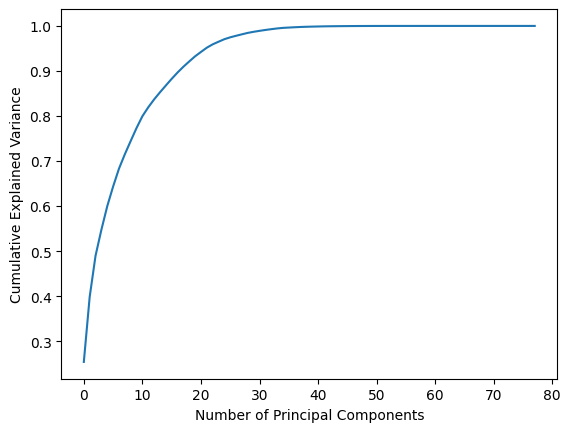

In [ ]:
pca_test = PCA().fit(df_scaled)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
pca = PCA(n_components=dimensions_num_for_PCA)
#principal_components = pca.fit(df_scaled).transform(df_scaled) => for normalised PCA

# Non-normalised PCA
principal_components = pca.fit(df_no_labels).transform(df_no_labels)
principal_components

array([[-8.16580279e+06, -1.19915322e+06,  1.27263308e+05, ...,
         8.93600581e+05,  2.96811663e+05,  5.98234594e+03],
       [-8.08590567e+06, -1.19861324e+06,  9.21736216e+04, ...,
         8.99819189e+05,  2.96878115e+05,  5.81150453e+03],
       [-1.00194924e+07, -1.22629216e+06,  2.02487220e+05, ...,
        -2.15507753e+05, -5.82407941e+04, -3.75222176e+04],
       ...,
       [-9.77881129e+06,  1.20711384e+05,  1.08402286e+05, ...,
        -1.99889067e+05, -4.93926336e+04, -4.26804840e+04],
       [-9.80388112e+06, -4.42548507e+05,  1.21580327e+05, ...,
        -1.96639141e+05, -4.85337246e+04, -3.96503044e+04],
       [-9.72175186e+06, -6.79955648e+05,  1.08244069e+05, ...,
        -1.93449359e+05, -3.30418761e+04, -3.68706087e+04]])

In [ ]:
df_pc = pd.DataFrame(data = principal_components)
df_pc

,0,1,2,3,4,5,6
0,-8.165803e+06,-1.199153e+06,127263.307756,231525.444244,893600.580534,296811.662984,5982.345935
1,-8.085906e+06,-1.198613e+06,92173.621578,222554.882115,899819.189254,296878.115459,5811.504529
2,-1.001949e+07,-1.226292e+06,202487.219507,-114026.034526,-215507.753418,-58240.794133,-37522.217603
3,-8.104574e+06,-1.198907e+06,114579.819424,232052.538819,886792.249240,309302.450961,6391.775131
4,-1.001953e+07,-1.226232e+06,202496.514118,-114079.976276,-215668.219754,-58255.708667,-37616.209415
...,...,...,...,...,...,...,...
286091,-9.702691e+06,-6.754558e+05,108811.962532,-113698.699726,-192210.876425,-27627.809010,-36484.272722
286092,-9.338204e+06,-9.387585e+05,107612.275294,-53678.418683,-166703.000669,86349.888528,-14930.171400
286093,-9.778811e+06,1.207114e+05,108402.286219,-123110.822316,-199889.066997,-49392.633591,-42680.484006
286094,-9.803881e+06,-4.425485e+05,121580.327254,-122251.188352,-196639.141355,-48533.724648,-39650.304436


#apply our approach

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

# Apply K-means
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(df_pc)

# Apply DBSCAN
dbscan = DBSCAN(eps=30, min_samples=1000)
dbscan_labels = dbscan.fit_predict(df_pc)


In [ ]:
len(dbscan_labels)

286096

In [ ]:
import numpy as np

In [ ]:
(unique1, counts1)=np.unique(dbscan_labels,return_counts=True)
(unique2, counts2)=np.unique(kmeans_labels,return_counts=True)

In [ ]:
(unique1, counts1)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 array([209801,   1509,   2594,   1901,   1052,   6644,   2902,   4015,
          1632,   6036,   1247,   2116,   1126,   3735,   2748,   1350,
          5715,   1556,   1213,   2510,   1083,   1197,   1231,   6021,
          1698,   1220,   2876,   2974,   1373,   1134,   1654,   1132,
          1101]))

In [ ]:
(unique2, counts2)

(array([0, 1], dtype=int32), array([272083,  14013]))

In [ ]:
from collections import Counter

# Combine K-means and DBSCAN cluster labels
combined_labels = list(zip(kmeans_labels, dbscan_labels))

# Create a meta-cluster
meta_cluster_labels = []
for labels in combined_labels:
   counter = Counter(labels)
   meta_cluster_labels.append(counter.most_common(1)[0][0])


In [ ]:
print(len(meta_cluster_labels))
print(len(kmeans_labels))
print(len(dbscan_labels))

286096
286096
286096


In [ ]:
dbscan_labels.shape

(286096,)

In [ ]:
meta_cluster_labels=np.array(meta_cluster_labels)

In [ ]:
meta_cluster_labels=meta_cluster_labels.reshape(meta_cluster_labels.shape[0],-1)

In [ ]:
meta_cluster_labels.shape

(286096, 1)

In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039297 sha256=9b7b761b3031a1292f83793fa7a5b09ac636927b8064704d404939906d6fc137
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.6
    Uninstalling Cython-3.0.6:
      Successfully uninstalled Cython-3.0.6


In [ ]:
import hdbscan

In [ ]:
# Apply HDBSCAN to the meta-cluster
hdbscan1 = hdbscan.HDBSCAN(min_cluster_size=10)
final_labels = hdbscan1.fit_predict(meta_cluster_labels)

In [ ]:
len(final_labels)

286096

In [ ]:
np.unique(final_labels)

array([0, 1])

In [ ]:
df_pc.shape

(286096, 7)

In [ ]:
X=df_pc
y=final_labels

In [ ]:
type(y)

numpy.ndarray

In [ ]:
y=pd.Series(y)

In [ ]:
X=pd.DataFrame(X)


In [ ]:
X_train, X_test, y_train, y_test=get_shuffled_stratifiedKFold_train_test_split(X,y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(190731, 7)
(95365, 7)
(190731,)
(95365,)


In [ ]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train),average="weighted")
    test_precision = metrics.precision_score(y_test, model.predict(X_test),average="weighted")

    train_recall = metrics.recall_score(y_train, model.predict(X_train),average="weighted")
    test_recall = metrics.recall_score(y_test, model.predict(X_test),average="weighted")

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))




In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

In [ ]:

tdt = DecisionTreeClassifier().fit(X_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", X_train, X_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 99.99895139726314
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 99.998951408825
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 99.99895139726314


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Assuming model is your machine learning model
# Assuming X and y are your features and target variable
# Adjust these variables based on your actual model and data

# Define the number of folds
num_folds = 5

# Create a StratifiedKFold object for stratified sampling (maintains class distribution)
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(tdt, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Display the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Scores: [0.99992136 0.99994757 0.99992135 0.99994757 0.99992135]
Mean Accuracy: 0.9999318412344316
Standard Deviation: 1.2842371599314011e-05


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


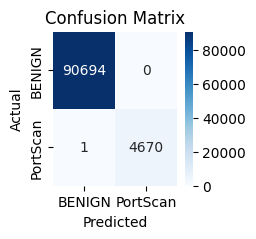

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names):
    # Calculate metrics
    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    # Print metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Create confusion matrix
    cm = confusion_matrix(actual_labels, predicted_labels)

    # Plot confusion matrix
    plt.figure(figsize=(len(label_names), len(label_names)))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example usage:
# Assuming you have actual labels, predicted labels, and label names
actual_labels = y_test
predicted_labels = tdt.predict(X_test)
label_names = ['BENIGN', 'PortScan']


# Call the function
calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names)


#tune using HYPEROPT

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Define the search space
space = {
   'criterion': hp.choice('criterion', ['gini', 'entropy']),
   'max_depth': hp.choice('max_depth', range(1, 25)),
   'min_samples_split': hp.uniform('min_samples_split', 0.001, 1),
   'min_samples_leaf': hp.uniform('min_samples_leaf', 0.001,1 ),
}

# Define the objective function
def objective(params):
   clf = DecisionTreeClassifier(**params)
   score = cross_val_score(clf, X_train, y_train, cv=3).mean()
   return {'loss': -score, 'status': STATUS_OK }

# Run the optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

In [ ]:
# 'Reduced dimensions' variable for altering the number of PCA principal components. Can be altered for needs.
# Only 7 principal components needed when using non-normalised PCA dataset.
dimensions_num_for_PCA = 7

# Max number of permutations to run. Can be altered for needs.
number_of_permutations = 100

# 10 folds is usually the heuristic to follow for larger datasets of around this size.
num_of_splits_for_skf = 10

# Seed value to pass into models so that repeated runs result in the same output
seed_val = 1

# Number of statistical distance measures to run (for the results, columns section)
num_of_statistical_dist_measures = 6



In [ ]:
Friday_Morning_Data = pd.read_csv('/content/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df = Friday_Morning_Data.copy()
print("Datatype of Dataframe i.e. Pandas Dataframe: ", type(df))
print("Datatype of Column i.e. Pandas Series: ", type(df.iloc[:, 1]))
df.head()

Datatype of Dataframe i.e. Pandas Dataframe:  <class 'pandas.core.frame.DataFrame'>
Datatype of Column i.e. Pandas Series:  <class 'pandas.core.series.Series'>


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df_cleaned = df.copy()
df_cleaned = clean_dataset(df_cleaned) # see methods at top of notebook
df_cleaned

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286462,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286463,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286464,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286465,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df_cleaned = df_cleaned.reset_index()
# Removing un-needed index column added by reset_index method
df_cleaned.drop('index', axis=1, inplace=True)
df_cleaned

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286091,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286092,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286093,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286094,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# Saving the label attribute before dropping it.
df_labels = df_cleaned['label']
# Shows all the possible labels/ classes a model can predict.
# Need to alter these to numeric 0, 1, etc... for model comprehension (e.g. pd.get_dummies()).
df_labels.unique()

array(['BENIGN', 'PortScan'], dtype=object)

In [ ]:
# Axis=1 means columns. Axis=0 means rows. inplace=False means that the original 'df' isn't altered.
df_no_labels = df_cleaned.drop('label', axis=1, inplace=False)
# Getting feature names for the StandardScaler process
df_features = df_no_labels.columns.tolist()
# Printing out Dataframe with no label column, to show successful dropping
df_no_labels

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,24,32,0.0,0.0,0,0,0.0,0.0,0,0
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,24,32,0.0,0.0,0,0,0.0,0.0,0,0
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,24,32,0.0,0.0,0,0,0.0,0.0,0,0
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286091,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,31,20,0.0,0.0,0,0,0.0,0.0,0,0
286092,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,30,20,0.0,0.0,0,0,0.0,0.0,0,0
286093,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,47,20,0.0,0.0,0,0,0.0,0.0,0,0
286094,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,31,20,0.0,0.0,0,0,0.0,0.0,0,0


In [ ]:
df_scaled = StandardScaler().fit_transform(df_no_labels)
# Converting back to dataframe
df_scaled = pd.DataFrame(data = df_scaled, columns = df_features)
df_scaled


,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
0,-0.520898,-0.187809,1.921576,1.429893,1.301913,0.083183,1.143000,-0.427193,0.520360,0.726763,...,1.493893,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
1,-0.520898,-0.185393,1.921576,1.429893,1.301913,0.083183,1.143000,-0.427193,0.520360,0.726763,...,1.493893,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
2,-0.520898,-0.245528,-0.126811,-0.089163,-0.125195,-0.053141,-0.247378,-0.427193,-0.308105,-0.209924,...,-0.116102,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
3,-0.520898,-0.186116,1.921576,1.359240,1.336198,0.076910,1.143000,-0.427193,0.540263,0.729026,...,1.493893,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
4,1.784164,-0.245532,-0.126811,-0.053837,-0.125195,-0.053141,-0.247378,-0.427193,-0.308105,-0.209924,...,-0.116102,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286091,-0.493464,-0.236595,2.331253,1.889143,0.587823,2.021738,1.490594,-0.427193,0.038237,0.711439,...,1.963476,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
286092,-0.493464,-0.228285,2.331253,1.959797,0.584609,1.993352,1.490594,-0.427193,0.036676,0.711676,...,1.896392,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
286093,-0.493464,-0.238160,3.406657,3.514181,0.639251,4.179364,1.490594,-0.427193,-0.048179,0.563765,...,3.036806,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
286094,-0.493464,-0.239023,2.382463,2.065778,0.587823,2.106896,1.490594,-0.427193,0.031310,0.702577,...,1.963476,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561


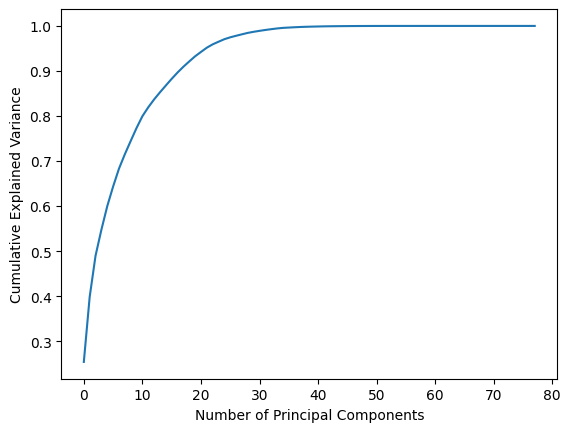

In [ ]:
pca_test = PCA().fit(df_scaled)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
pca = PCA(n_components=dimensions_num_for_PCA)
#principal_components = pca.fit(df_scaled).transform(df_scaled) => for normalised PCA

# Non-normalised PCA
principal_components = pca.fit(df_no_labels).transform(df_no_labels)
principal_components

array([[-8.16580279e+06, -1.19915322e+06,  1.27263308e+05, ...,
         8.93600581e+05,  2.96811663e+05,  5.98234594e+03],
       [-8.08590567e+06, -1.19861324e+06,  9.21736216e+04, ...,
         8.99819189e+05,  2.96878115e+05,  5.81150453e+03],
       [-1.00194924e+07, -1.22629216e+06,  2.02487220e+05, ...,
        -2.15507753e+05, -5.82407941e+04, -3.75222176e+04],
       ...,
       [-9.77881129e+06,  1.20711384e+05,  1.08402286e+05, ...,
        -1.99889067e+05, -4.93926336e+04, -4.26804840e+04],
       [-9.80388112e+06, -4.42548507e+05,  1.21580327e+05, ...,
        -1.96639141e+05, -4.85337246e+04, -3.96503044e+04],
       [-9.72175186e+06, -6.79955648e+05,  1.08244069e+05, ...,
        -1.93449359e+05, -3.30418761e+04, -3.68706087e+04]])

In [ ]:
df_pc = pd.DataFrame(data = principal_components)
df_pc

,0,1,2,3,4,5,6
0,-8.165803e+06,-1.199153e+06,127263.307756,231525.444244,893600.580534,296811.662984,5982.345935
1,-8.085906e+06,-1.198613e+06,92173.621578,222554.882115,899819.189254,296878.115459,5811.504529
2,-1.001949e+07,-1.226292e+06,202487.219507,-114026.034526,-215507.753418,-58240.794133,-37522.217603
3,-8.104574e+06,-1.198907e+06,114579.819424,232052.538819,886792.249240,309302.450961,6391.775131
4,-1.001953e+07,-1.226232e+06,202496.514118,-114079.976276,-215668.219754,-58255.708667,-37616.209415
...,...,...,...,...,...,...,...
286091,-9.702691e+06,-6.754558e+05,108811.962532,-113698.699726,-192210.876425,-27627.809010,-36484.272722
286092,-9.338204e+06,-9.387585e+05,107612.275294,-53678.418683,-166703.000669,86349.888528,-14930.171400
286093,-9.778811e+06,1.207114e+05,108402.286219,-123110.822316,-199889.066997,-49392.633591,-42680.484006
286094,-9.803881e+06,-4.425485e+05,121580.327254,-122251.188352,-196639.141355,-48533.724648,-39650.304436


#apply our approach

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

# Apply K-means
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(df_pc)

# Apply DBSCAN
dbscan = DBSCAN(eps=30, min_samples=1000)
dbscan_labels = dbscan.fit_predict(df_pc)


In [ ]:
len(dbscan_labels)

286096

In [ ]:
import numpy as np

In [ ]:
(unique1, counts1)=np.unique(dbscan_labels,return_counts=True)
(unique2, counts2)=np.unique(kmeans_labels,return_counts=True)

In [ ]:
(unique1, counts1)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 array([209801,   1509,   2594,   1901,   1052,   6644,   2902,   4015,
          1632,   6036,   1247,   2116,   1126,   3735,   2748,   1350,
          5715,   1556,   1213,   2510,   1083,   1197,   1231,   6021,
          1698,   1220,   2876,   2974,   1373,   1134,   1654,   1132,
          1101]))

In [ ]:
(unique2, counts2)

(array([0, 1], dtype=int32), array([272083,  14013]))

In [ ]:
from collections import Counter

# Combine K-means and DBSCAN cluster labels
combined_labels = list(zip(kmeans_labels, dbscan_labels))

# Create a meta-cluster
meta_cluster_labels = []
for labels in combined_labels:
   counter = Counter(labels)
   meta_cluster_labels.append(counter.most_common(1)[0][0])


In [ ]:
print(len(meta_cluster_labels))
print(len(kmeans_labels))
print(len(dbscan_labels))

286096
286096
286096


In [ ]:
dbscan_labels.shape

(286096,)

In [ ]:
meta_cluster_labels=np.array(meta_cluster_labels)

In [ ]:
meta_cluster_labels=meta_cluster_labels.reshape(meta_cluster_labels.shape[0],-1)

In [ ]:
meta_cluster_labels.shape

(286096, 1)

In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039297 sha256=9b7b761b3031a1292f83793fa7a5b09ac636927b8064704d404939906d6fc137
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.6
    Uninstalling Cython-3.0.6:
      Successfully uninstalled Cython-3.0.6


In [ ]:
import hdbscan

In [ ]:
# Apply HDBSCAN to the meta-cluster
hdbscan1 = hdbscan.HDBSCAN(min_cluster_size=10)
final_labels = hdbscan1.fit_predict(meta_cluster_labels)

In [ ]:
len(final_labels)

286096

In [ ]:
np.unique(final_labels)

array([0, 1])

In [ ]:
df_pc.shape

(286096, 7)

In [ ]:
X=df_pc
y=final_labels

In [ ]:
type(y)

numpy.ndarray

In [ ]:
y=pd.Series(y)

In [ ]:
X=pd.DataFrame(X)


In [ ]:
X_train, X_test, y_train, y_test=get_shuffled_stratifiedKFold_train_test_split(X,y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(190731, 7)
(95365, 7)
(190731,)
(95365,)


In [ ]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train),average="weighted")
    test_precision = metrics.precision_score(y_test, model.predict(X_test),average="weighted")

    train_recall = metrics.recall_score(y_train, model.predict(X_train),average="weighted")
    test_recall = metrics.recall_score(y_test, model.predict(X_test),average="weighted")

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))




In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

In [ ]:

tdt = DecisionTreeClassifier().fit(X_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", X_train, X_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 99.99895139726314
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 99.998951408825
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 99.99895139726314


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Assuming model is your machine learning model
# Assuming X and y are your features and target variable
# Adjust these variables based on your actual model and data

# Define the number of folds
num_folds = 5

# Create a StratifiedKFold object for stratified sampling (maintains class distribution)
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(tdt, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Display the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Scores: [0.99992136 0.99994757 0.99992135 0.99994757 0.99992135]
Mean Accuracy: 0.9999318412344316
Standard Deviation: 1.2842371599314011e-05


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
False Positive Rate (FPR): 0.0000


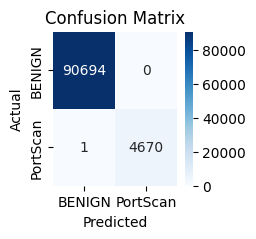

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
import seaborn as sns

def calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names):
    # Calculate metrics
    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    # Compute ROC curve to get False Positive Rate (FPR)
    fpr, _, _ = roc_curve(actual_labels, predicted_labels)

    # Print metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'False Positive Rate (FPR): {fpr[0]:.4f}')

    # Create confusion matrix
    cm = confusion_matrix(actual_labels, predicted_labels)

    # Plot confusion matrix
    plt.figure(figsize=(len(label_names), len(label_names)))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example usage:
# Assuming you have actual labels, predicted labels, and label names
actual_labels = y_test
predicted_labels = tdt.predict(X_test)
label_names = ['BENIGN', 'PortScan']

# Call the function
calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names)


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


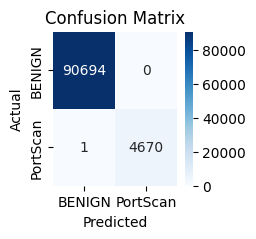

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names):
    # Calculate metrics
    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    # Print metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Create confusion matrix
    cm = confusion_matrix(actual_labels, predicted_labels)

    # Plot confusion matrix
    plt.figure(figsize=(len(label_names), len(label_names)))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example usage:
# Assuming you have actual labels, predicted labels, and label names
actual_labels = y_test
predicted_labels = tdt.predict(X_test)
label_names = ['BENIGN', 'PortScan']


# Call the function
calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names)


In [ ]:
# 'Reduced dimensions' variable for altering the number of PCA principal components. Can be altered for needs.
# Only 7 principal components needed when using non-normalised PCA dataset.
dimensions_num_for_PCA = 7

# Max number of permutations to run. Can be altered for needs.
number_of_permutations = 100

# 10 folds is usually the heuristic to follow for larger datasets of around this size.
num_of_splits_for_skf = 10

# Seed value to pass into models so that repeated runs result in the same output
seed_val = 1

# Number of statistical distance measures to run (for the results, columns section)
num_of_statistical_dist_measures = 6



In [ ]:
Friday_Morning_Data = pd.read_csv('/content/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df = Friday_Morning_Data.copy()
print("Datatype of Dataframe i.e. Pandas Dataframe: ", type(df))
print("Datatype of Column i.e. Pandas Series: ", type(df.iloc[:, 1]))
df.head()

Datatype of Dataframe i.e. Pandas Dataframe:  <class 'pandas.core.frame.DataFrame'>
Datatype of Column i.e. Pandas Series:  <class 'pandas.core.series.Series'>


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df_cleaned = df.copy()
df_cleaned = clean_dataset(df_cleaned) # see methods at top of notebook
df_cleaned

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286462,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286463,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286464,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286465,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df_cleaned = df_cleaned.reset_index()
# Removing un-needed index column added by reset_index method
df_cleaned.drop('index', axis=1, inplace=True)
df_cleaned

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286091,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286092,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286093,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286094,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# Saving the label attribute before dropping it.
df_labels = df_cleaned['label']
# Shows all the possible labels/ classes a model can predict.
# Need to alter these to numeric 0, 1, etc... for model comprehension (e.g. pd.get_dummies()).
df_labels.unique()

array(['BENIGN', 'PortScan'], dtype=object)

In [ ]:
# Axis=1 means columns. Axis=0 means rows. inplace=False means that the original 'df' isn't altered.
df_no_labels = df_cleaned.drop('label', axis=1, inplace=False)
# Getting feature names for the StandardScaler process
df_features = df_no_labels.columns.tolist()
# Printing out Dataframe with no label column, to show successful dropping
df_no_labels

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,24,32,0.0,0.0,0,0,0.0,0.0,0,0
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,24,32,0.0,0.0,0,0,0.0,0.0,0,0
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,24,32,0.0,0.0,0,0,0.0,0.0,0,0
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286091,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,31,20,0.0,0.0,0,0,0.0,0.0,0,0
286092,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,30,20,0.0,0.0,0,0,0.0,0.0,0,0
286093,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,47,20,0.0,0.0,0,0,0.0,0.0,0,0
286094,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,31,20,0.0,0.0,0,0,0.0,0.0,0,0


In [ ]:
df_scaled = StandardScaler().fit_transform(df_no_labels)
# Converting back to dataframe
df_scaled = pd.DataFrame(data = df_scaled, columns = df_features)
df_scaled


,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
0,-0.520898,-0.187809,1.921576,1.429893,1.301913,0.083183,1.143000,-0.427193,0.520360,0.726763,...,1.493893,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
1,-0.520898,-0.185393,1.921576,1.429893,1.301913,0.083183,1.143000,-0.427193,0.520360,0.726763,...,1.493893,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
2,-0.520898,-0.245528,-0.126811,-0.089163,-0.125195,-0.053141,-0.247378,-0.427193,-0.308105,-0.209924,...,-0.116102,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
3,-0.520898,-0.186116,1.921576,1.359240,1.336198,0.076910,1.143000,-0.427193,0.540263,0.729026,...,1.493893,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
4,1.784164,-0.245532,-0.126811,-0.053837,-0.125195,-0.053141,-0.247378,-0.427193,-0.308105,-0.209924,...,-0.116102,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286091,-0.493464,-0.236595,2.331253,1.889143,0.587823,2.021738,1.490594,-0.427193,0.038237,0.711439,...,1.963476,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
286092,-0.493464,-0.228285,2.331253,1.959797,0.584609,1.993352,1.490594,-0.427193,0.036676,0.711676,...,1.896392,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
286093,-0.493464,-0.238160,3.406657,3.514181,0.639251,4.179364,1.490594,-0.427193,-0.048179,0.563765,...,3.036806,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
286094,-0.493464,-0.239023,2.382463,2.065778,0.587823,2.106896,1.490594,-0.427193,0.031310,0.702577,...,1.963476,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561


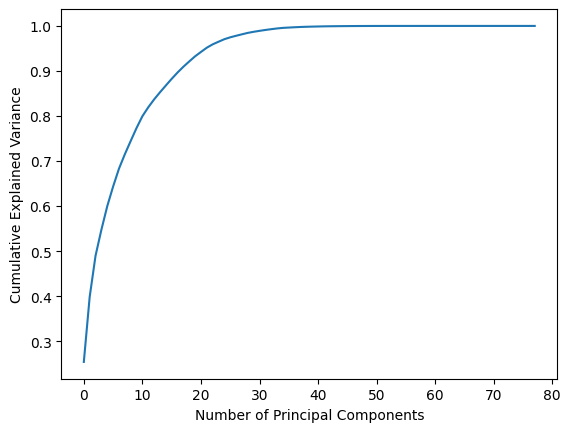

In [ ]:
pca_test = PCA().fit(df_scaled)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
pca = PCA(n_components=dimensions_num_for_PCA)
#principal_components = pca.fit(df_scaled).transform(df_scaled) => for normalised PCA

# Non-normalised PCA
principal_components = pca.fit(df_no_labels).transform(df_no_labels)
principal_components

array([[-8.16580279e+06, -1.19915322e+06,  1.27263308e+05, ...,
         8.93600581e+05,  2.96811663e+05,  5.98234594e+03],
       [-8.08590567e+06, -1.19861324e+06,  9.21736216e+04, ...,
         8.99819189e+05,  2.96878115e+05,  5.81150453e+03],
       [-1.00194924e+07, -1.22629216e+06,  2.02487220e+05, ...,
        -2.15507753e+05, -5.82407941e+04, -3.75222176e+04],
       ...,
       [-9.77881129e+06,  1.20711384e+05,  1.08402286e+05, ...,
        -1.99889067e+05, -4.93926336e+04, -4.26804840e+04],
       [-9.80388112e+06, -4.42548507e+05,  1.21580327e+05, ...,
        -1.96639141e+05, -4.85337246e+04, -3.96503044e+04],
       [-9.72175186e+06, -6.79955648e+05,  1.08244069e+05, ...,
        -1.93449359e+05, -3.30418761e+04, -3.68706087e+04]])

In [ ]:
df_pc = pd.DataFrame(data = principal_components)
df_pc

,0,1,2,3,4,5,6
0,-8.165803e+06,-1.199153e+06,127263.307756,231525.444244,893600.580534,296811.662984,5982.345935
1,-8.085906e+06,-1.198613e+06,92173.621578,222554.882115,899819.189254,296878.115459,5811.504529
2,-1.001949e+07,-1.226292e+06,202487.219507,-114026.034526,-215507.753418,-58240.794133,-37522.217603
3,-8.104574e+06,-1.198907e+06,114579.819424,232052.538819,886792.249240,309302.450961,6391.775131
4,-1.001953e+07,-1.226232e+06,202496.514118,-114079.976276,-215668.219754,-58255.708667,-37616.209415
...,...,...,...,...,...,...,...
286091,-9.702691e+06,-6.754558e+05,108811.962532,-113698.699726,-192210.876425,-27627.809010,-36484.272722
286092,-9.338204e+06,-9.387585e+05,107612.275294,-53678.418683,-166703.000669,86349.888528,-14930.171400
286093,-9.778811e+06,1.207114e+05,108402.286219,-123110.822316,-199889.066997,-49392.633591,-42680.484006
286094,-9.803881e+06,-4.425485e+05,121580.327254,-122251.188352,-196639.141355,-48533.724648,-39650.304436


#apply our approach

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

# Apply K-means
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(df_pc)

# Apply DBSCAN
dbscan = DBSCAN(eps=30, min_samples=1000)
dbscan_labels = dbscan.fit_predict(df_pc)


In [ ]:
len(dbscan_labels)

286096

In [ ]:
import numpy as np

In [ ]:
(unique1, counts1)=np.unique(dbscan_labels,return_counts=True)
(unique2, counts2)=np.unique(kmeans_labels,return_counts=True)

In [ ]:
(unique1, counts1)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 array([209801,   1509,   2594,   1901,   1052,   6644,   2902,   4015,
          1632,   6036,   1247,   2116,   1126,   3735,   2748,   1350,
          5715,   1556,   1213,   2510,   1083,   1197,   1231,   6021,
          1698,   1220,   2876,   2974,   1373,   1134,   1654,   1132,
          1101]))

In [ ]:
(unique2, counts2)

(array([0, 1], dtype=int32), array([272083,  14013]))

In [ ]:
from collections import Counter

# Combine K-means and DBSCAN cluster labels
combined_labels = list(zip(kmeans_labels, dbscan_labels))

# Create a meta-cluster
meta_cluster_labels = []
for labels in combined_labels:
   counter = Counter(labels)
   meta_cluster_labels.append(counter.most_common(1)[0][0])


In [ ]:
print(len(meta_cluster_labels))
print(len(kmeans_labels))
print(len(dbscan_labels))

286096
286096
286096


In [ ]:
dbscan_labels.shape

(286096,)

In [ ]:
meta_cluster_labels=np.array(meta_cluster_labels)

In [ ]:
meta_cluster_labels=meta_cluster_labels.reshape(meta_cluster_labels.shape[0],-1)

In [ ]:
meta_cluster_labels.shape

(286096, 1)

In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039297 sha256=9b7b761b3031a1292f83793fa7a5b09ac636927b8064704d404939906d6fc137
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.6
    Uninstalling Cython-3.0.6:
      Successfully uninstalled Cython-3.0.6


In [ ]:
import hdbscan

In [ ]:
# Apply HDBSCAN to the meta-cluster
hdbscan1 = hdbscan.HDBSCAN(min_cluster_size=10)
final_labels = hdbscan1.fit_predict(meta_cluster_labels)

In [ ]:
len(final_labels)

286096

In [ ]:
np.unique(final_labels)

array([0, 1])

In [ ]:
df_pc.shape

(286096, 7)

In [ ]:
X=df_pc
y=final_labels

In [ ]:
type(y)

numpy.ndarray

In [ ]:
y=pd.Series(y)

In [ ]:
X=pd.DataFrame(X)


In [ ]:
X_train, X_test, y_train, y_test=get_shuffled_stratifiedKFold_train_test_split(X,y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(190731, 7)
(95365, 7)
(190731,)
(95365,)


In [ ]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train),average="weighted")
    test_precision = metrics.precision_score(y_test, model.predict(X_test),average="weighted")

    train_recall = metrics.recall_score(y_train, model.predict(X_train),average="weighted")
    test_recall = metrics.recall_score(y_test, model.predict(X_test),average="weighted")

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))




In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

In [ ]:

tdt = DecisionTreeClassifier().fit(X_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", X_train, X_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 99.99895139726314
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 99.998951408825
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 99.99895139726314


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Assuming model is your machine learning model
# Assuming X and y are your features and target variable
# Adjust these variables based on your actual model and data

# Define the number of folds
num_folds = 5

# Create a StratifiedKFold object for stratified sampling (maintains class distribution)
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(tdt, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Display the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Scores: [0.99992136 0.99994757 0.99992135 0.99994757 0.99992135]
Mean Accuracy: 0.9999318412344316
Standard Deviation: 1.2842371599314011e-05


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
False Positive Rate (FPR): 0.0000


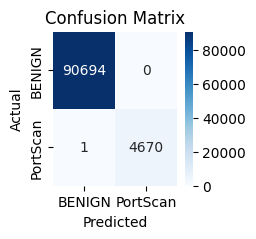

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
import seaborn as sns

def calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names):
    # Calculate metrics
    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    # Compute ROC curve to get False Positive Rate (FPR)
    fpr, _, _ = roc_curve(actual_labels, predicted_labels)

    # Print metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'False Positive Rate (FPR): {fpr[0]:.4f}')

    # Create confusion matrix
    cm = confusion_matrix(actual_labels, predicted_labels)

    # Plot confusion matrix
    plt.figure(figsize=(len(label_names), len(label_names)))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example usage:
# Assuming you have actual labels, predicted labels, and label names
actual_labels = y_test
predicted_labels = tdt.predict(X_test)
label_names = ['BENIGN', 'PortScan']

# Call the function
calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names)


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


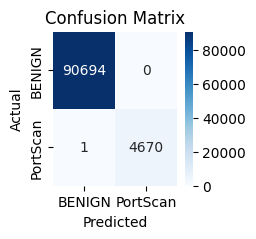

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names):
    # Calculate metrics
    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    # Print metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Create confusion matrix
    cm = confusion_matrix(actual_labels, predicted_labels)

    # Plot confusion matrix
    plt.figure(figsize=(len(label_names), len(label_names)))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example usage:
# Assuming you have actual labels, predicted labels, and label names
actual_labels = y_test
predicted_labels = tdt.predict(X_test)
label_names = ['BENIGN', 'PortScan']


# Call the function
calculate_metrics_and_plot_cm(actual_labels, predicted_labels, label_names)


#the END

#This is the code for the proposed research paper. Results may vary by +- 0.0001